# Week 04: Pre-Class Assignment: <br> Linear Algebra and Machine Learning

### <p style="text-align: right;"> &#9989; Kyle Taft


### Goals for today's pre-class assignment

In this Pre-Class Assignment you are going to recall some linear algebra and apply it in the context of machine learning. The main learning goals are:

* understand how linear algebra is used in machine learning,
* perform linear regression using linear algebra,
* use non-linear functions to perform linear regression.

Total number of points: **39 points**


**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-Class Assignments" submission folder on D2L.  Submission instructions can be found at the end of the notebook.

___
## Part 1. Linear regression with `pinv` (8 points)

![xkcd](https://imgs.xkcd.com/comics/machine_learning.png)

In this problem you are going to implement linear regression using the pseudoinverse library in Python's [`linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html). (In problem 3 below you will do this by hand, so enjoy using the [`pinv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html) library while you can!)

It is highly recommended that you bookmark [to the linalg documentation](https://numpy.org/doc/stable/reference/routines.linalg.html) in Numpy, and familiarize yourself with the various options that are there.


The code below creates random pair of points $(x_i,y_i)$ and adds a little bit of noise to them.

&#9989; **Task 1.1: (2 points)** Create the data matrix ${\bf X}$ called `X_data`.

In [41]:
# Usual imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This creates fake data for us to use.
x = np.linspace(0, 10, 10)
y = - x/2 + np.random.randn(x.shape[0])

# Create the data matrix
X_data = np.vstack((x,np.ones(10))).T # Add dummy feature
print(X_data.shape)

(10, 2)


&#9989; **Task 1.2: (4 points)** Calculate the pseudo-inverse of `X_data` and use it to calculate the `slope` and `intercept` of the regression line.

Text(0, 0.5, 'y')

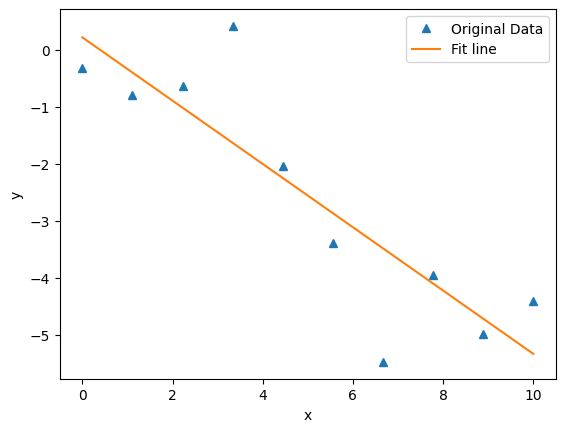

In [42]:
### Complete these lines of code to get the slope and intercept.
p_inv = np.linalg.pinv(X_data) 
slope = (np.linalg.pinv(X_data) @ y)[0]
inter = (np.linalg.pinv(X_data) @ y)[1]

# Let's see if it worked.
plt.plot(x, y, '^', label = 'Original Data')
plt.plot(x, slope*x + inter, label = 'Fit line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

&#9989; **Task 1.3: (2 points)**  Create new fake data (with noise or without noise) using a different equation and recalculate the fit to show that your code works for more than the one simple case. This is a good time to play with your code by trying lots of csaes that will build your intuition.

Text(0, 0.5, 'y')

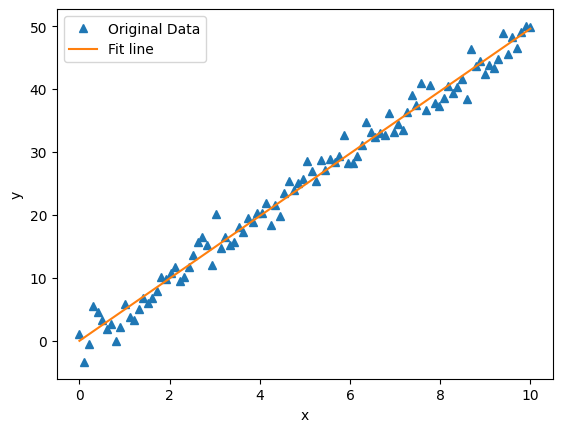

In [43]:
# Put your code here

# New data
x = np.linspace(0, 10, 100)
y = 5*x + np.random.randn(x.shape[0])*2

# Create the data matrix
X_data = np.vstack((x,np.ones(100))).T #Add dummy feature

p_inv = np.linalg.pinv(X_data) 
slope = (np.linalg.pinv(X_data) @ y)[0]
inter = (np.linalg.pinv(X_data) @ y)[1]
plt.plot(x, y, '^', label = 'Original Data')
plt.plot(x, slope*x + inter, label = 'Fit line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

___
## Part 2. Radial Basis Functions (19 points)

![opt_pic](https://chrisjmccormick.files.wordpress.com/2013/08/architecture_simple2.png)

When we first encounter linear regression it might be in the context of fitting a line of the form $mx+b$ to some data; or, more generally, ${\bf w}^T{\bf x}$ in higher dimensions. This structure occurs very widely in machine learning contexts because linear operations are much easier to handle and because we might want to linearly combine inputs before performing a nonlinear operation $\sigma$, as in $\sigma({\bf w}^T{\bf x}$ .

As discussed in the lecture, it would be extremely powerful if there were a way to include non-linearities while still exploiting everything we know (_e.g._, fast Python libraries) about linear algebra.

One way to do that is to linearly combine non-linear functions, as in

$$ f({\bf x}) = \sum_c \alpha_c K(|{\bf x} - {\bf x}_c|),$$

where in this case all of the $K$ are the same functions, but they are located at the "centers" ${\bf x}_c$. Note that the $K$ act as a basis function and that they only depend on the radial distance $|{\bf x} - {\bf x}_c|$; hence, they are called "radial basis functions" or RBFs for short. The RBFs are generally nonlinear functions, such as Gaussians, which we will use here.

The machine learning idea behind RBFs is rather simple: we wish to take some data, in the form of $\{{\bf x}_i\}$ and $\{f({\bf x}_i)\}$,  to inform what we think $f({\bf x})$ looks like at any ${\bf x}$ and make predictions based on that; this is a standard ML regression problem. The reason this is a linear problem is that once we have the data we can form the numbers $K(|{\bf x}_i - {\bf x}_c|)$; then, solving for the $\alpha_c$ is a linear algebra problem:

$$f({\bf x}_1) = \alpha_1 K(0) + \alpha_2K({\bf x}_1 - {\bf x}_2) + \alpha_3 K({\bf x}_1 - {\bf x}_3) + \ldots$$
$$f({\bf x}_2) = \alpha_1 K({\bf x}_2 - {\bf x}_1) + \alpha_2K(0) + \alpha_3 K({\bf x}_2 - {\bf x}_3) + \ldots$$

$$\vdots$$

Or, just:

$${\bf f} = {\bf K}{\bf \alpha}.$$
$${\bf \alpha} ={\bf K}^{-1} {\bf f}.$$


&#9989; **Task 2.1: (2 points)** Compute and plot $x \cos(x)$ on an interval $x\in [0, 2\pi]$; this is your "actual" function.

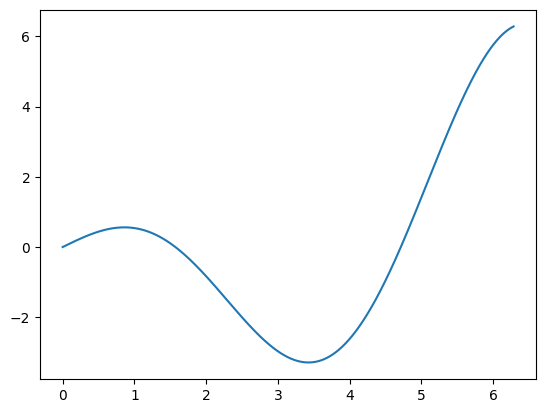

In [46]:
# Put your code here
func = lambda x: x*np.cos(x)
x = np.linspace(0, 2*np.pi, 1000)
plt.plot(x, func(x))

&#9989; **Task 2.2: (2 points)** Form your data $f$ from the function above at the points $x\in [1, 2, 3, 4]$ - this your fake data.


In [73]:
# Put your code here 
fake_x = [1,2,3,4]
f = func(fake_x)

&#9989; **Task 2.3: (4 points)** Assume that the $K$s are Gaussians $\exp(-x^2)$ and compute the matrix ${\bf K}$.

In [87]:
# Put your code here
K = lambda x: np.exp(-x**2)

K_matrix = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        K_matrix[i,j] = K(np.abs(fake_x[i] - fake_x[j]))

&#9989; **Task 2.4: (2 points)** Using SciPy's `linalg.solve` package, solve for the coefficients $\alpha_c$.

In [88]:
# Put your code here
from scipy.linalg import solve
alphas = solve(K_matrix, f) # f = K_matrix @ alphas

&#9989; **Task 2.5: (2 points)** Plot your function $f$ by summing for the Gaussians weighted by the $\alpha_c$, in the same plot as the data points, as well as each term in the sum of Gaussians as a dashed line.

In [89]:
# Calculate the function
f_radial = np.zeros(len(x))
for c,point in enumerate(fake_x):
    f_radial += alphas[c]*K(np.abs(x-point))

Text(0, 0.5, 'y')

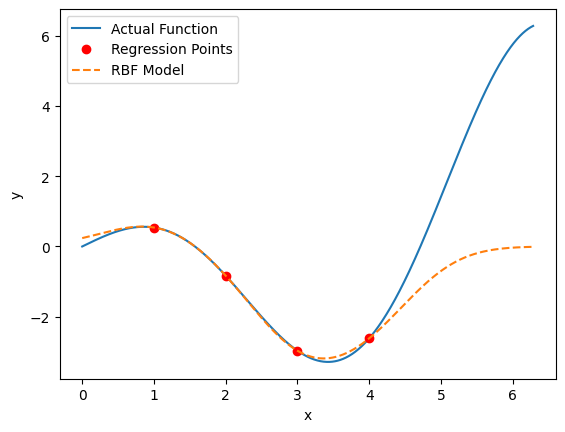

In [90]:
# Put your code here

# Actual function
plt.plot(x, func(x), label = "Actual Function")
# Data points as red dots 
plt.plot([1,2,3,4],f, 'ro', label = "Regression Points")
# RBF model
plt.plot(x, f_radial, ls = '--', label = "RBF Model")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

&#9989; **Task 2.6: (5 points)** Next, you are going to explore what would have happened if you have less data. Follow these steps:

* Copy the code from above in a new code cell below.
* Change the names of the variables so that nothing gets overwritten.
* Remove both the interior points ($x = 2, 3$) from the data.
* Rerun the code to get a new prediction with only half the data.
* Plot the actual function, the prediction with four points and the prediction with two points.


Text(0, 0.5, 'y')

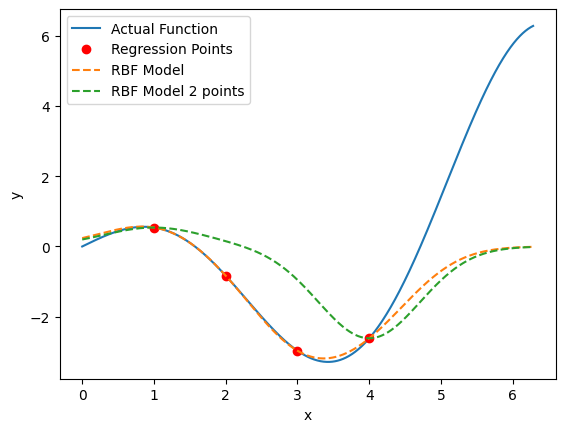

In [92]:
# Put your code here

# Remove two data points
fake_x2 = [1,4]
f2 = func(fake_x2)

# Reconstruct the K matrix
K_matrix2 = np.zeros((2,2))
for i in range(2):
    for j in range(2):
        K_matrix2[i,j] = K(np.abs(fake_x2[i] - fake_x2[j]))

# Calculate the alphas
alphas2 = solve(K_matrix2, f2) # f = K_matrix @ alphas

# Recalculate the RBF model
f_radial2 = np.zeros(len(x))
for c,point in enumerate(fake_x2):
    f_radial2 += alphas2[c]*K(np.abs(x-point))

# Actual function
plt.plot(x, func(x), label = "Actual Function")
# Data points as red dots 
plt.plot([1,2,3,4],f, 'ro', label = "Regression Points")
# RBF model with 4 points
plt.plot(x, f_radial, ls = '--', label = "RBF Model")
# RBF model with 2 points
plt.plot(x, f_radial2, ls = '--', label = "RBF Model 2 points")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

&#9989; **Task 2.7: (2 points)** In the text/markdown cell below, write your conclusions. In particular, think about having done this in reverse where you started with two points, holding two back, and then compared with the full data set to see if your prediction changed. Also, what does this tell you about ML situations where the data is too sparse?

<font size=6 color="#009600">&#9998;</font> **There is a major difference between holding the two points back and having all 4 of the fake data points. The only 2 point data does a very bad job on interpreting the data inbetween while the 4 points does a extremely well job just struggling at the bend. Yet, neither of the models do well outside of the range of the points. This tells me that if I have decently regularlly spaced points I can model the function well, but if I have spacing such that major features (such as the up bend in the function) is completely lost it fits bad.** 


___
## Part 3. Normal Equation by Hand (12 points)

In this problem you are going to get more practice using the pseudoinverse, this time by hand to get practice with simple matrix operations by hand. There are two parts to this problem: one for which the pseudoinverse is, in fact, not needed and one for which it is needed. The former part is to build your intutition and to show that the method reduces to a well-known result. The latter is to use some libraries on a more complex problem. You will also get some practice using $\LaTeX$ for linear algebra problems.

You are given some data in the form ${\bf x} = [0, 1]$ and ${\bf y} = [0, 2]$ - quite a huge dataset! Your hypothesis is a linear model and you wish to find the weights. Once you know the weights you can predict values of $y$ for new choices of $x$. The hypothesis takes the form

$$ y = w_0 + w_1 x.$$

Obviously for this case you can easily solve this problem as was shown in class; but, here you will use the pseudoinverse. To get you started, the matrix equation to be solved is:

$$\begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} .$$

Note how $w_0$ is used as a "bias" or "intercept" here, which gives the entry $1$ in the $X$ matrix. Recall that each row is a member of the dataset, which is why there are two rows (but, see part 3B of this problem...).

&#9989; **Task 3.1: (8 points)** In the next markdown cell, use $\LaTeX$ to write down these quantities, working out each quantity by hand (no code, just $\LaTeX$, until the final step):

1. the matrix $X$ for this dataset
2. the vector ${\bf y}$ for this dataset
3. the transpose $X^T$
4. the product $X^TX$
5. the inverse $(X^TX)^{-1}$
6. the product $(X^TX)^{-1}X^T$
7. the product $(X^TX)^{-1}X^T{\bf y}$
8. the vector ${\bf w}$

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. the matrix $X$ for this dataset:
   $$X = \begin{bmatrix} 1 & 0 \\ 1 & 1 \end{bmatrix}$$
    
2. the vector ${\bf y}$ for this dataset:
    $$y = \begin{bmatrix} 0 \\ 2 \end{bmatrix} $$
   
3. the transpose $X^T$:
    $$X = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}$$
   
4. the product $X^TX$:
    $$X^TX = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}\begin{bmatrix} 1 & 0 \\ 1 & 1 \end{bmatrix} =  \begin{bmatrix} 2 & 1 \\ 1 & 1 \end{bmatrix} $$
   
5. the inverse $(X^TX)^{-1}$:
   $$(X^TX)^{-1} = \begin{bmatrix} 2 & 1 \\ 1 & 1 \end{bmatrix}^{-1} = \begin{bmatrix} 1 & -1 \\ -1 & 2 \end{bmatrix}$$
   
6. the product $(X^TX)^{-1}X^T$
   $$(X^TX)^{-1}X^T = \begin{bmatrix} 1 & -1 \\ -1 & 2 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ -1 & 1 \end{bmatrix} $$
   
7. the product $(X^TX)^{-1}X^T{\bf y}$
   $$(X^TX)^{-1}X^T{\bf y} = \begin{bmatrix} 1 & 0 \\ -1 & 1 \end{bmatrix}\begin{bmatrix} 0 \\ 2 \end{bmatrix} = \begin{bmatrix} 0 \\ 2 \end{bmatrix}  $$

8. the vector ${\bf w}$
   $$w = \begin{bmatrix} 0 \\ 2 \end{bmatrix}  $$


&#9989; **Task 3.2: (2 points)** Put all the above into code and plot the data points and the line obtained from the weights $\bf w$.


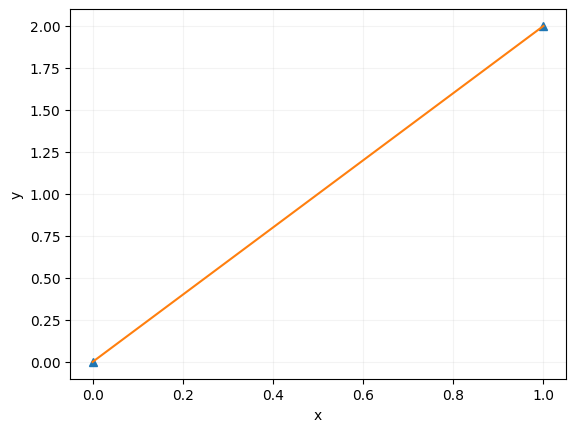

In [111]:
# Put your code here
x = np.array([0, 1])
y = np.array([0, 2])
plt.plot(x, y, '^')

# Calculate w
X = np.vstack((np.ones(2),x)).T
w = np.linalg.inv((X.T@X)) @ X.T @ y

# Plot your line 
plt.plot(x, w*x, label = 'Fit line')

plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha = 0.15)

&#9989; **Task 3.3: (2 points)** Repeat what you just did but using the new dataset ${\bf x} = [0, 1, 2]$ and ${\bf y} = [0, 2, 3]$, this time using code. Do *not* use the `pinv` library this time! Show your result in a plot.

Some helper code is given here:

In [120]:
np.linalg.inv((X.T@X))

LinAlgError: Singular matrix

In [124]:
np.linalg.pinv(X)

array([[ 8.33333333e-01,  3.33333333e-01, -1.66666667e-01],
       [-5.00000000e-01, -5.64008002e-17,  5.00000000e-01]])

In [125]:
np.linalg.inv((X.T@X)) @ X.T

array([[ 0.83333333,  0.33333333, -0.16666667],
       [-0.5       ,  0.        ,  0.5       ]])

In [126]:
w

array([0.16666667, 1.5       ])

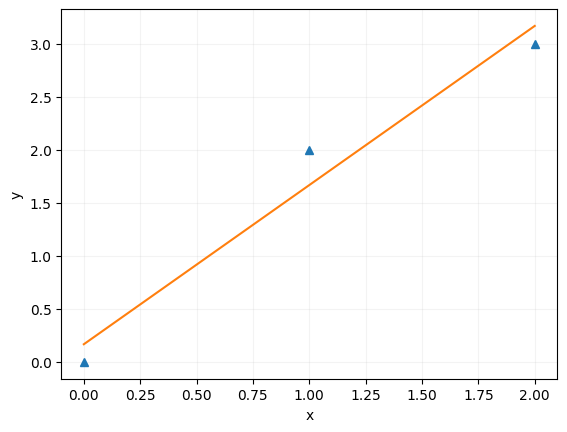

In [130]:
# Put your code here
x = np.array([0, 1, 2])
y = np.array([0, 2, 3])
plt.plot(x, y, '^')

X = np.vstack((np.ones(3),x)).T
w = np.linalg.inv((X.T@X)) @ X.T @ y

# Plot your line

plt.plot(x, w[1]*x + w[0], label = 'Fit line')


plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha = 0.15)

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/QyrbnptkyA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.